In [49]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import math
from scipy.integrate import solve_ivp

In [50]:
global NumSpecies,mu,lambdaa,gamma,D,eta,kappa

In [51]:
def MultiSpecies(t,y):
    dydt=np.zeros(NumSpecies*(1+NumSpecies))
    for i in range(NumSpecies):
        ss=1
        sumy=0
        for j in range(NumSpecies):
            if i!=j:
                ss=ss*(1+lambdaa[j]*y[NumSpecies+i*NumSpecies+j]/y[i])
            sumy=sumy+y[j]
        dydt[i]=mu[i]*y[i]*ss*(1-(gamma*sumy-gamma*y[i]+y[i]))-D*y[i]
        for j in range(NumSpecies):
                if j==i:
                    dydt[NumSpecies+i*NumSpecies+j]=dydt[i]
                else:
                    ss=1
                    for k in range(NumSpecies):
                        if (k!=i)&(k!=j):
                            ss=ss*(1+lambdaa[k]*y[NumSpecies+i*NumSpecies+k]/y[i])
                    donor=0
                    for k in range(NumSpecies):
                        donor=donor+y[NumSpecies+k*NumSpecies+j]
                    dydt[NumSpecies+i*NumSpecies+j]=mu[i]*y[NumSpecies+i*NumSpecies+j]*ss*(1+lambdaa[j])*(1-(gamma*sumy-gamma*y[i]+y[i]))+eta*(y[i]-y[NumSpecies+i*NumSpecies+j])*donor-(kappa+D)*y[NumSpecies+i*NumSpecies+j]
    return dydt

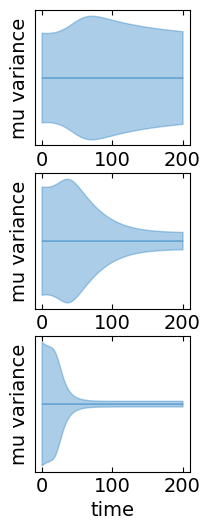

In [52]:
mu0=0.5
NumSpecies=20
etas=[0.05,0.1,0.2]
gamma=0.9
kappa=0.005
D=0.2
initial=np.zeros(NumSpecies**2+NumSpecies)
for i in range(NumSpecies):
    initial[i]=1/NumSpecies
    initial[NumSpecies+i*NumSpecies+i]=initial[i]
timespan=np.arange(0,200.1,0.1)

plt.figure(figsize=(2,6))
for jkl in range(len(etas)):
    eta=etas[jkl]
    lambdaa=-0.2+0.4*np.random.rand(NumSpecies)
    mu=mu0*(1+lambdaa)
    sol=solve_ivp(MultiSpecies,[0,max(timespan)],initial,method='RK45',t_eval=timespan)
    y1=sol.y
    t1=sol.t
    ss=np.zeros((len(t1),NumSpecies))
    for i in range(NumSpecies):
        ss[:,i]=mu[i]
        for j in range(NumSpecies):
            if i!=j:
                ss[:,i]=ss[:,i]*(1+lambdaa[j]*np.divide(y1[NumSpecies+i*NumSpecies+j,:],y1[i,:]))

    yy=np.std(ss,axis=1)
    plt.subplot(3,1,jkl+1)
    plt.fill_between(t1,0,yy,color=(0.1797,0.5195,0.7734),alpha=0.4)
    plt.fill_between(t1,0,-yy,color=(0.1797,0.5195,0.7734),alpha=0.4)
    plt.rcParams['font.size'] =14
    plt.xlabel('time')
    plt.ylabel('mu variance')
    plt.xticks(ticks=(0,100,200))
    plt.yticks(ticks=())
    plt.tick_params(direction='in',top='true',right='true')
    plt.savefig('MuTemporalChange.pdf')

    
    